### 04 - 03 Subplots, Text and Annotations
As seen from the previous example of plotting histogram of an RGB image, sometimes it is helpful to visualize different data/ views of same data together. Matplotlib has the concept of subplots that we have been using (without even knowing about it) since Intro to Matplotlib to create `figure` and `axes` object.

The concept of subplots revolve around the argument that, while an `Axes` object can only belong to one `Figure` (and it **MUST**), A `Figure` can have many `Axes` objects. These axes are typically called *subplots*. They act just like regular `Axes`.

Lets look at a simple example

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import pandas as pd

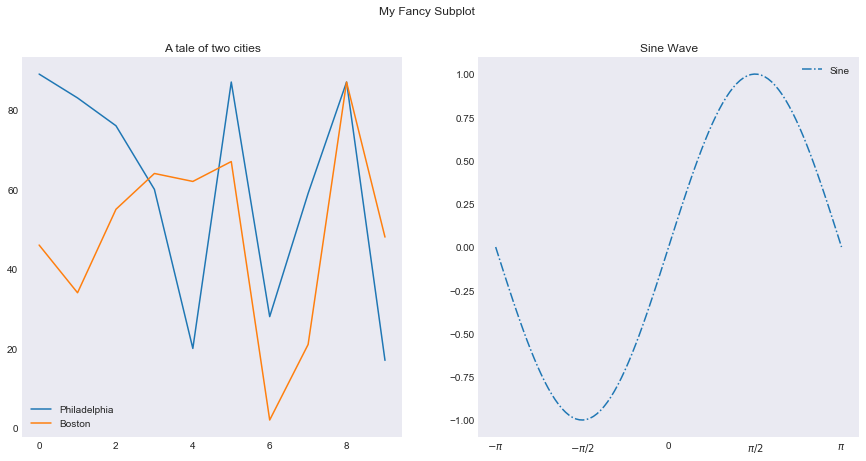

In [26]:
# 1 row and 2 column figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
# when subplot has more than one row or column, the second argument
# returned by `plt.subplots` is a tuple.

# two axes objects
ax1 = axes[0]
ax2 = axes[1]

# plot on first axes object (aka first subplot at posn row=1, column=1)
ax1.plot(np.arange(10), np.random.randint(1, 99, size=10), label='Philadelphia')
ax1.plot(np.arange(10), np.random.randint(1, 99, size=10), label='Boston')
ax1.set_title('A tale of two cities')
ax1.grid(which='major')
ax1.legend()

# plot on second axes object (aka subplot at posn row=1, column=2)
theta = np.linspace(-np.pi, np.pi, 100)
ax2.plot(theta, np.sin(theta), ls='-.', label='Sine')
ax2.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax2.set_xticklabels(['$-\pi$', '$-\pi/2$', 0, '$\pi/2$', '$\pi$'])
ax2.set_title("Sine Wave")
ax2.grid(which='major')
ax2.legend()

# Add a centered title for the whole figure
fig.suptitle('My Fancy Subplot')
plt.show()

#### 04 - 03.01 Spacing
The spacing between the subplots can be adjusted using [`plt.subplots_adjust()`](http://matplotlib.org/api/pyplot_api.html?#matplotlib.pyplot.subplots_adjust). 

Play around with the example below to see how the different arguments affect the spacing.

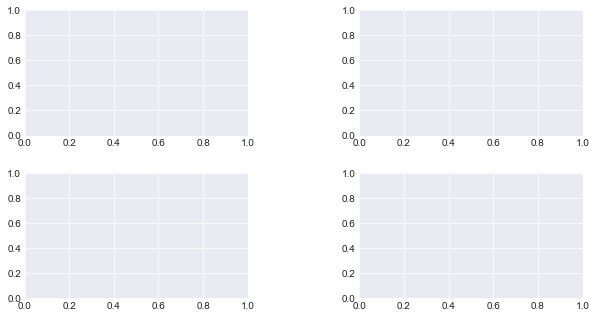

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
plt.subplots_adjust(wspace=0.5, hspace=0.3,
                    left=0.125, right=0.9,
                    top=0.9,    bottom=0.1)

A common complaint with matplotlib users is that the labels do not fit with the subplots, or the label of one subplot spills onto another subplot's area. Matplotlib does not currently have any sort of robust layout engine, as it is a design decision to minimize the amount of *magic* that matplotlib performs. They intend to let users have complete control over their plots. $LaTeX$ users would be quite familiar with the amount of frustration that can occur with placement of figures in their documents.

That said, there have been some efforts to develop tools that users can use to help address the most common compaints. The [`Tight Layout`](http://matplotlib.org/users/tight_layout_guide.html) feature, when invoked, will attempt to resize margins, and subplots so that nothing overlaps.

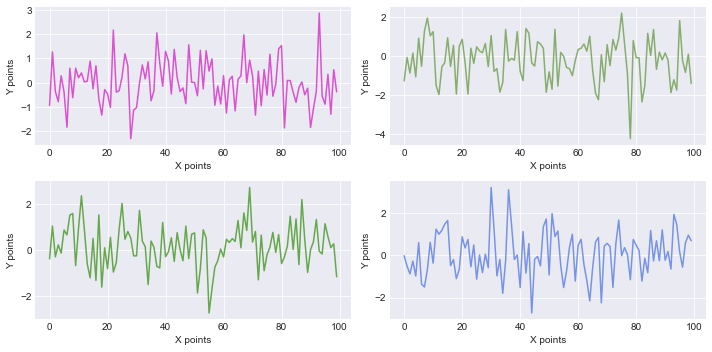

In [64]:
def example_plot(ax):
    ax.plot(np.random.randn(100), color=np.random.rand(3,1))
    ax.set_xlabel('X points', fontsize=10)
    ax.set_ylabel('Y points', fontsize=10)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)
# try commenting the below line and see the difference
plt.tight_layout()

> Notice how the colors are randomly generated. It is not always the best practice, but good enough for now.

> For a future practice, create your own list of colors and cycle through them in your plots. You can find one such example in Miscellaneous plots module

#### 04 - 03.02 Sharing axes
There will be times when you want to have the x axis and/or the y axis of your subplots to be "shared". Sharing an axis means that the axis in one or more subplots will be tied together such that any change in one of the axis changes all of the other shared axes. This works very nicely with autoscaling arbitrary datasets that may have overlapping domains. Furthermore, when interacting with the plots (panning and zooming), all of the shared axes will pan and zoom automatically.

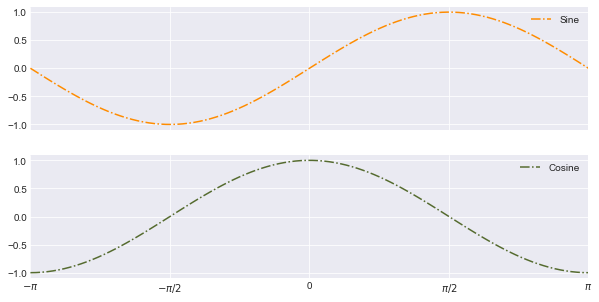

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 5))
theta = np.linspace(-np.pi, np.pi, 100)

# Sine plot
ax1.plot(theta, np.sin(theta), ls='-.', label='Sine', color='darkorange')
ax1.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax1.set_xticklabels(['$-\pi$', '$-\pi/2$', 0, '$\pi/2$', '$\pi$'])
ax1.legend()

ax1.set_xlim(-np.pi, np.pi)

# Cosine plot
ax2.plot(theta, np.cos(theta), ls='-.', label='Cosine', color='darkolivegreen')
ax2.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax2.set_xticklabels(['$-\pi$', '$-\pi/2$', 0, '$\pi/2$', '$\pi$'])
ax2.legend()

#### 04 - 03.03 GridSpec
Under the hood, matplotlib utilizes [`GridSpec`](http://matplotlib.org/api/gridspec_api.html) to lay out the subplots. While `plt.subplots()` is fine for simple cases, sometimes you will need more advanced subplot layouts. In such cases, you should use GridSpec directly. GridSpec is outside the scope of this tutorial, but it is handy to know that it exists. [`GridSpec Guide`](http://matplotlib.org/users/gridspec.html) is a guide on how to use it.

Lets take a look at a small example:

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in log


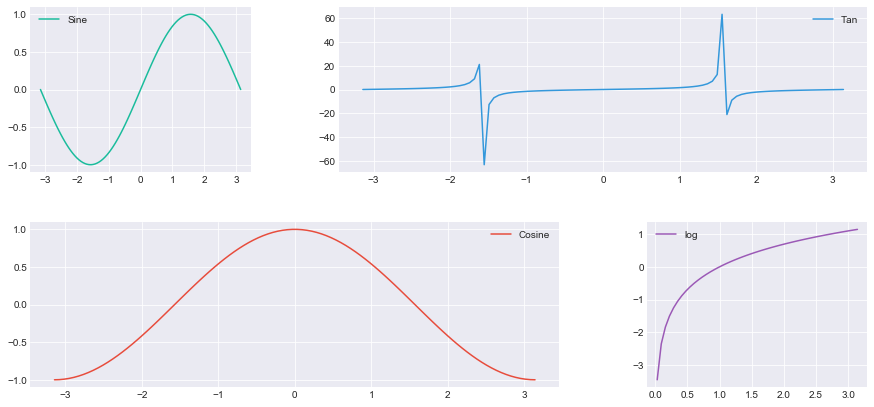

In [62]:
fig = plt.figure(figsize=(15, 7))
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
ax0 = plt.subplot(grid[0, 0])
ax1 = plt.subplot(grid[0, 1:])
ax2 = plt.subplot(grid[1, :2])
ax3 = plt.subplot(grid[1, 2])

theta = np.linspace(-np.pi, np.pi, 100)

ax0.plot(theta, np.sin(theta), label='Sine', color='#1abc9c')
ax1.plot(theta, np.tan(theta), label='Tan', color='#3498db')
ax2.plot(theta, np.cos(theta), label='Cosine', color='#e74c3c')
ax3.plot(theta, np.log(theta), label='log', color='#9b59b6')

ax0.legend()
ax1.legend()
ax2.legend()
ax3.legend()

### 04 - 03.04 Text and Annotations

The plots that we have made till now, they convey the information visually perfectly fine. However lets load a dataset like 311 noise complaints for the month of Nov 2016 through January 2017

In [ ]:
noise = pd.read_csv('sample_datasets/2012_NYC_Noise_Complaints.csv', 
                    parse_dates=['Created Date'])

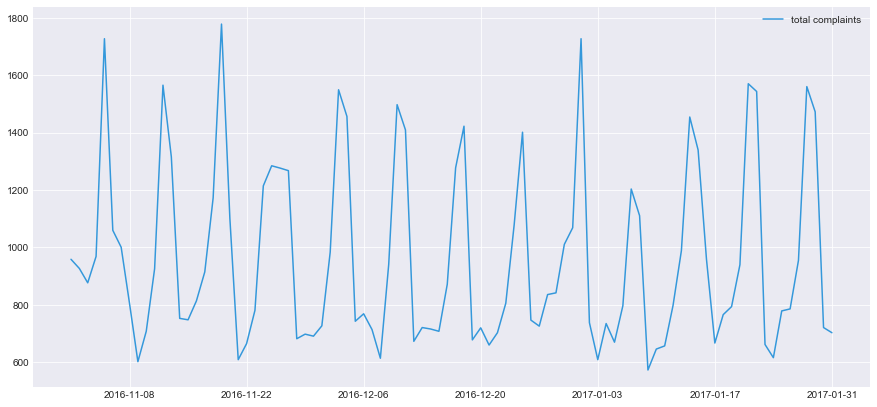

In [124]:
import matplotlib as mpl
# All the complaints aggregated by day
total_complaints = noise.groupby(by=noise['Created Date'])['Unique Key'].count()
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(total_complaints, color='#3498db', label='total complaints')
ax.legend()

For such plots, conveying information like a particular market dip or simply drawing readers attention requires some small textual cues and labels. Matplotlib provides two ways one can place arbitrary text anywhere they want on a plot. The first is a simple [`text()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.text).  Then there is the fancier [`annotate()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate) function that can help *point out* what you want to annotate.

Lets take a look at simple text method which takes the text and the `x` and `y` position of where you want to put the text. (Also lets clean up our x-axis a bit)

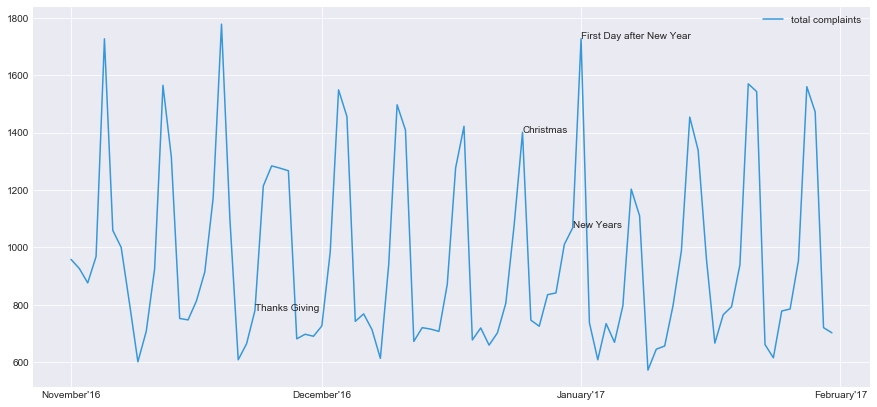

In [125]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(total_complaints, color='#3498db', label='total complaints')

# formatting the xaxis
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter("%B'%y"));
ax.legend()

# Let point out some occassions
fav_dates={"2016-11-23":"Thanks Giving", 
          "2016-12-25": "Christmas",
          "2016-12-31": "New Years",
          "2017-1-1":   "First Day after New Year"
          }
for date in fav_dates.items():
    ax.text(date[0], total_complaints.loc[date[0]], date[1])

> Hmm.. looks like people get *crabby* after the new years

The above plot conveys the information we want it to but lacks flexibility in terms of pointing at things you want to draw the attention to. 

Lets take a look at annotate function which offers much more control and additional features. Lets modify the same plot with annotate function this time.

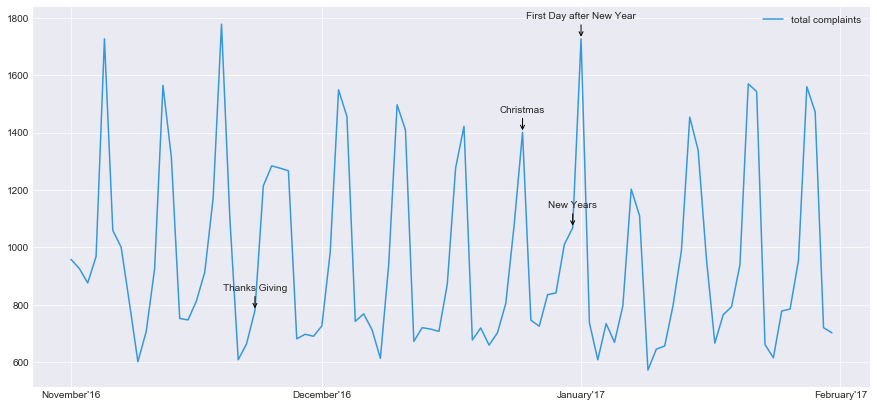

In [129]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(total_complaints, color='#3498db', label='total complaints')

# formatting the xaxis
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter("%B'%y"));
ax.legend()

# Let point out some occassions
fav_dates={"2016-11-23":"Thanks Giving", 
          "2016-12-25": "Christmas",
          "2016-12-31": "New Years",
          "2017-1-1":   "First Day after New Year"
          }
for date in fav_dates.items():
    xposition = date[0]
    yposition = total_complaints.loc[date[0]]
    ax.annotate(date[1], xy=(xposition, yposition),
               xycoords='data', ha='center',
               xytext=(0, 20), textcoords='offset points',
               arrowprops=dict(arrowstyle="->"))

The arrow style is controlled through the `arrowprops` dictionary. These options are fairly well-documented in documentation (press `?` or `Shift+<TAB>`) so we will not repeat ourselves here but let's take a look at some of those options.

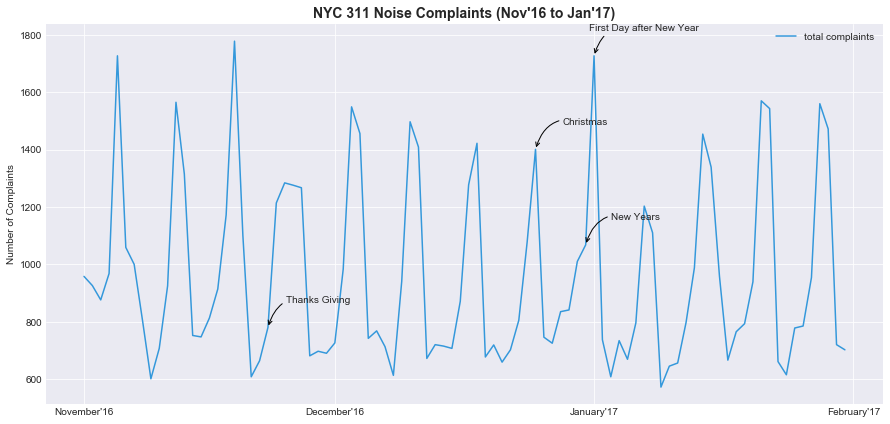

In [167]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(total_complaints, color='#3498db', label='total complaints')

# formatting the xaxis
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter("%B'%y"));
ax.legend()

# Let point out some occassions
fav_dates={"2016-11-23":"Thanks Giving", 
          "2016-12-25": "Christmas",
          "2016-12-31": "New Years",
          "2017-1-1":   "First Day after New Year"
          }
for date in fav_dates.items():
    xposition = date[0]
    yposition = total_complaints.loc[date[0]]
    ax.annotate(date[1], xy=(xposition, yposition),
               xycoords='data', ha='center',
               xytext=(50, 25), textcoords='offset points',
               arrowprops=dict(arrowstyle="->",
                               connectionstyle="arc3,rad=0.5",))

# For sake of completion
ax.set_title("NYC 311 Noise Complaints (Nov'16 to Jan'17)", 
             fontdict=dict(fontsize=14, 
                           fontweight='bold'))
ax.set_ylabel('Number of Complaints')